## Evaluating Error in a Linear Regression

In [1]:
from pydataset import data

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
tips = data('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

##### Here is some sample code to get you started:

In [3]:
from sklearn.linear_model import LinearRegression

X = tips[['total_bill']]
y = tips.tip

# Adding a Baseline for predicting a tip (AKA: the mean of tips column)
tips['baseline'] = tips.tip.mean()

# Creating a Linear Model that predicts tips based off of total bill:
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

# compute predictions and add to original dataframe
tips['yhat'] = predictions
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


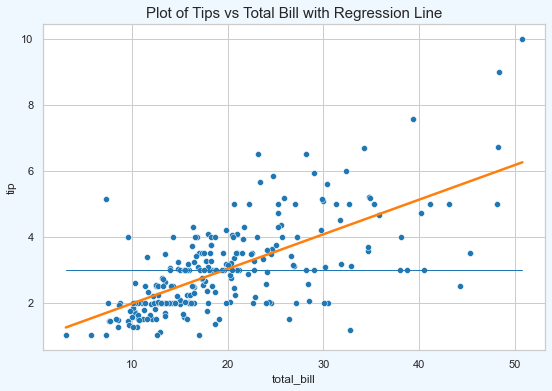

In [4]:
# Plot of tips and yhat regression line vs total bill

plt.figure(figsize = (9,6), facecolor="aliceblue")
sns.set_theme(style="whitegrid")

# Scatter Plot of tips vs total bill:
sns.scatterplot(x="total_bill", y="tip", data=tips, color="tab:blue")

# Plot of regression line:
sns.lineplot(x="total_bill", y="yhat",
             data=tips, color='tab:orange', linewidth=2.5)

sns.lineplot(x="total_bill", y="baseline",
             data=tips, color='tab:blue', linewidth=1)

plt.title("Plot of Tips vs Total Bill with Regression Line", fontsize = 15)
plt.show()

### 3. Plot the residuals for the linear regression model that you made.



In [5]:
tips['residual'] = tips.tip - tips.yhat
tips['baseline_residual'] = tips.tip - tips.baseline
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


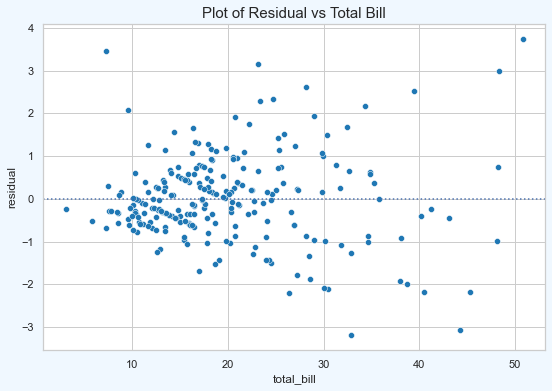

In [6]:
# Plot of residual vs Total Bill
plt.figure(figsize = (9,6), facecolor="aliceblue")
sns.set_theme(style="whitegrid")
sns.scatterplot(x = 'total_bill', y = 'residual', data = tips, color="tab:blue")
plt.axhline(0, ls = ':')
plt.title("Plot of Residual vs Total Bill", fontsize = 15)
plt.show()

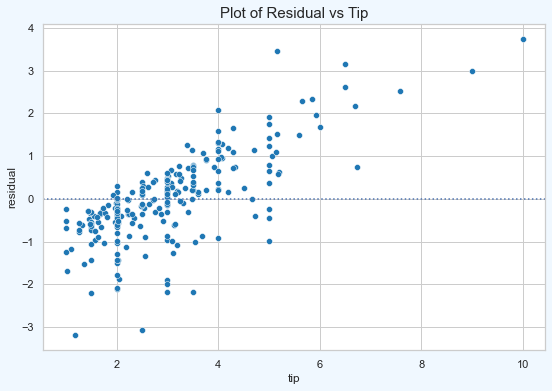

In [7]:
# Plot of residual vs Tip
plt.figure(figsize = (9,6), facecolor="aliceblue")
sns.set_theme(style="whitegrid")
sns.scatterplot(x = 'tip', y = 'residual', data = tips, color="tab:blue")
plt.axhline(0, ls = ':')
plt.title("Plot of Residual vs Tip", fontsize = 15)
plt.show()

* Not Heteroscedastic

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


In [9]:
# SSE = Sum of the Squared Errors => sum of residual squared => sum((y - yhat)^2)
# OLS = Ordinary Least Squares
SSE = (tips.residual**2).sum()
print(f' The SSE of the OLS model is: {round(SSE,2)}')

 The SSE of the OLS model is: 252.79


In [10]:
# ESS = Explained Sum of Squares => sum of (yhat - y)^2
ESS = sum((tips.yhat - tips.tip.mean())**2)
print(f' The ESS of the OLS model is: {round(ESS,2)}')

 The ESS of the OLS model is: 212.42


In [11]:
# TSS = Total Sum of Squares = ESS + SSE
TSS = ESS + SSE
print(f' The TSS of the OLS model is: {round(TSS,2)}')

 The TSS of the OLS model is: 465.21


In [12]:
# MSE = Mean Squared Error = SSE/n
MSE = SSE/len(tips)
print(f' The MSE of the OLS model is: {round(MSE,2)}')

 The MSE of the OLS model is: 1.04


In [13]:
# RMSE = Root Mean Squared Error
from math import sqrt
RMSE = sqrt(MSE)
print(f' The RMSE of the OLS model is: {round(RMSE,2)}')

 The RMSE of the OLS model is: 1.02


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).



In [14]:
SSE_baseline = (tips.baseline_residual**2).sum()
print(f' The SSE of the Baseline model is: {round(SSE_baseline,2)}')

 The SSE of the Baseline model is: 465.21


In [15]:
ESS = sum((tips.yhat - tips.tip.mean())**2)
print(f' The ESS of the Baseline model is: {round(ESS,2)}')

 The ESS of the Baseline model is: 212.42


In [16]:
TSS_baseline = ESS + SSE_baseline
print(f' The TSS of the Baseline model is: {round(TSS_baseline,2)}')

 The TSS of the Baseline model is: 677.64


In [17]:
MSE_baseline = SSE_baseline/len(tips)
print(f' The MSE of the Baseline model is: {round(MSE_baseline,2)}')

 The MSE of the Baseline model is: 1.91


In [18]:
RMSE_baseline = sqrt(MSE_baseline)
print(f' The RMSE of the Baseline model is: {round(RMSE_baseline,2)}')

 The RMSE of the Baseline model is: 1.38


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [19]:
print(f' SSE  - SSE  Baseline: {(SSE-SSE_baseline)}')
print(f' ESS  - ESS  Baseline: {(ESS-ESS)}')
print(f' TSS  - TSS  Baseline: {(TSS-TSS_baseline)}')
print(f' MSE  - MSE  Baseline: {(MSE-MSE_baseline)}')
print(f' RMSE - RMSE Baseline: {(RMSE-RMSE_baseline)}')

 SSE  - SSE  Baseline: -212.4237331984044
 ESS  - ESS  Baseline: 0.0
 TSS  - TSS  Baseline: -212.42373319840442
 MSE  - MSE  Baseline: -0.8705890704852639
 RMSE - RMSE Baseline: -0.3629495512601577


### 7. What is the amount of variance explained in your model?



In [20]:
from sklearn.metrics import r2_score
r2_score(tips.tip, tips.yhat)

0.45661658635167657

### 8. Is your model better than the baseline model?



In [21]:
# Yes

### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false


### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [22]:
mpg = data('mpg')

In [23]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [24]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model 
lm.fit(mpg[['displ']], mpg.hwy)

# prediction
predictions = lm.predict(mpg[['displ']])

In [25]:
mpg['yhat'] = predictions

In [26]:
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591


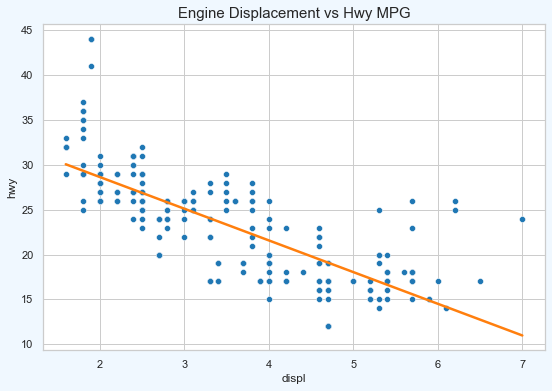

In [27]:
plt.figure(figsize = (9,6), facecolor="aliceblue")
sns.set_theme(style="whitegrid")

# Scatter Plot of tips vs total bill:
sns.scatterplot(x="displ", y="hwy", data=mpg, color="tab:blue")

# Plot of regression line:
sns.lineplot(x="displ", y="yhat",
             data=mpg, color='tab:orange', linewidth=2.5)

#sns.lineplot(x="total_bill", y="baseline",
#             data=mpg, color='tab:blue', linewidth=1)

plt.title("Engine Displacement vs Hwy MPG", fontsize = 15)
plt.show()

In [28]:
import evaluate as ev

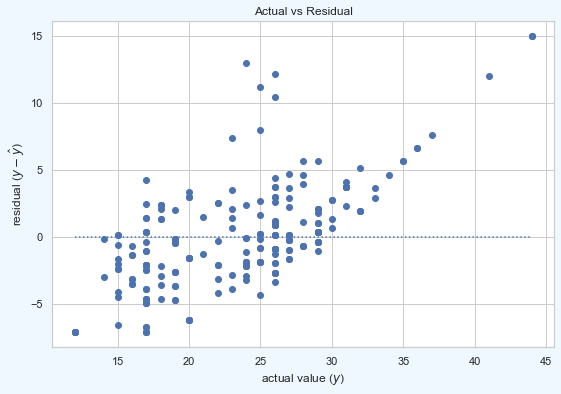

In [29]:
ev.plot_residuals(mpg.hwy, mpg.yhat)

In [30]:
ev.regression_errors(mpg.hwy, mpg.yhat)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
dtype: float64

In [34]:
ev.baseline_mean_errors(mpg.hwy)

{'sse': 8261.66239316239, 'mse': 35.30624954342902, 'rmse': 5.941906221359356}

In [35]:
ev.better_than_baseline(mpg.hwy, mpg.yhat)

True